In [ ]:
# Aliasing Demonstration in Digital Signal Processing
# Aliasing occurs when a signal is sampled below the Nyquist rate (2 * max frequency)
# This causes high-frequency signals to appear as lower-frequency signals

# Import required libraries
import numpy as np          # For numerical operations and array handling
import matplotlib.pyplot as plt  # For plotting signals

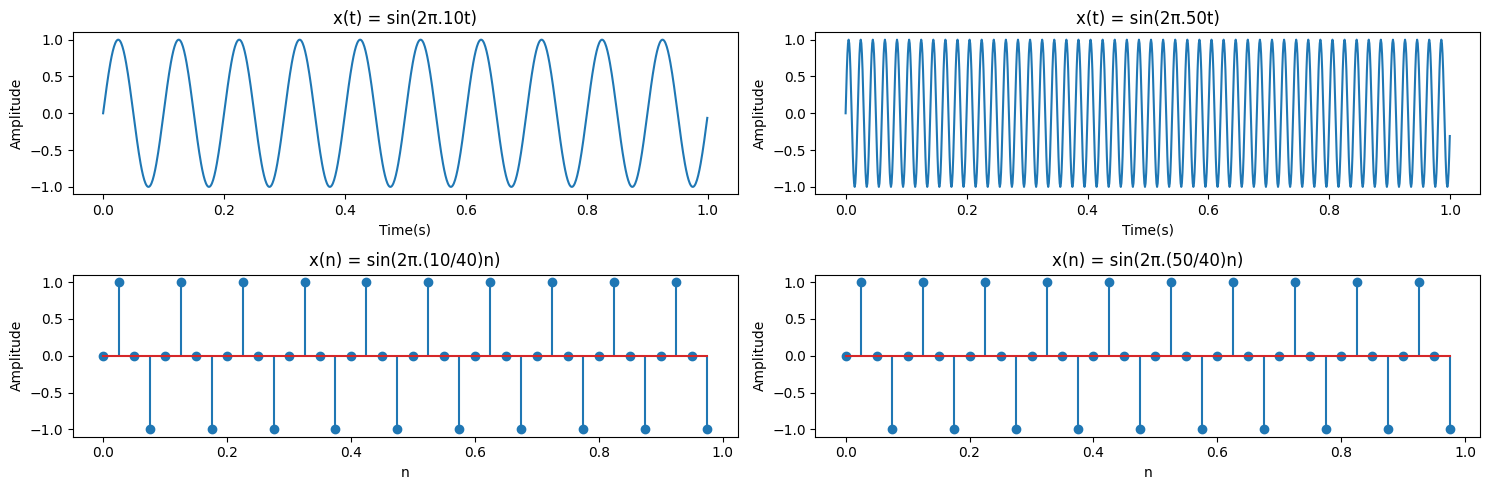

In [5]:
# Create continuous time vector from 0 to 1 second with 0.001s step (high resolution)
t = np.arange(0, 1, 0.001)

# Generate a 10 Hz sine wave (original signal frequency = 10 Hz)
x = np.sin(2 * np.pi * 10 * t)

# Create a figure with 2x2 subplots for comparison
plt.figure(figsize=(15, 5))

# Plot 1: Continuous 10 Hz sine wave
plt.subplot(2, 2, 1)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('x(t) = sin(2π.10t)')  # 10 Hz continuous signal

# Create continuous time vector for 50 Hz signal
t = np.arange(0, 1, 0.001)

# Generate a 50 Hz sine wave (higher frequency signal)
x = np.sin(2 * np.pi * 50 * t)

# Plot 2: Continuous 50 Hz sine wave
plt.subplot(2, 2, 2)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('x(t) = sin(2π.50t)')  # 50 Hz continuous signal

# Sampling frequency = 40 Hz (Nyquist frequency = 20 Hz)
# For 10 Hz signal: fs > 2*10 = 20 Hz, so NO aliasing (properly sampled)
fs = 40
n = np.arange(0, 1, 1/fs)  # Discrete time samples
x_n = np.sin(2 * np.pi * 10 * n)  # Sampled 10 Hz signal

# Plot 3: Sampled 10 Hz signal (no aliasing - properly reconstructed)
plt.subplot(2, 2, 3)
plt.stem(n, x_n)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x(n) = sin(2π.(10/40)n)')  # Normalized frequency = 10/40 = 0.25

# For 50 Hz signal: fs = 40 Hz < 2*50 = 100 Hz, so ALIASING occurs!
# The 50 Hz signal will appear as a 10 Hz signal due to aliasing
# Aliased frequency = |50 - 40| = 10 Hz (folds back into baseband)
fs = 40
n = np.arange(0, 1, 1/fs)  # Discrete time samples
x_n = np.sin(2 * np.pi * 50 * n)  # Sampled 50 Hz signal (aliased!)

# Plot 4: Sampled 50 Hz signal (ALIASING - appears same as 10 Hz!)
plt.subplot(2, 2, 4)
plt.stem(n, x_n)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x(n) = sin(2π.(50/40)n)')  # Notice: looks identical to Plot 3!

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# CONCLUSION: Both sampled signals look identical!
# This demonstrates aliasing - the 50 Hz signal "aliases" to 10 Hz
# when sampled at 40 Hz (below Nyquist rate of 100 Hz for 50 Hz signal)